# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 08

### Elementos do Grupo

Número: 54329   Nome: David da Costa Correia    
Número: 56906   Nome: Miguel Castro  
Número: 56922   Nome: João Leal

## 1. Processamento dos dados

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv("train.csv", sep=",")

col_idxs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
col_idxs_dum = [2, 3, 5, 6, 7, 8, 9] # the indexes to the non-continuous columns
col_names = np.array(data.columns)[col_idxs]
col_names_dum = np.array(data.columns)[col_idxs_dum] # the columns that must be converted into dummies

X = data.values[:,col_idxs]
df_X = data[col_names] # X dataframe
y = data.values[:,19]
y = y.astype('int')

df_X_dum = pd.get_dummies(df_X, columns=col_names_dum) # dummed X dataframe
X_dum = df_X_dum.values # dummed X

# Dividing the dummed X into 2 groups, a train group with 80% of the elements and a test group with 20% of the elements
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=1, train_size=0.80)

## 2. Ajustamento dos modelos

### 2.1. Teste de modelos e validação

Para escolher os melhores modelos para cada tipologia - Árvores de Decisão, k-NN e Naïve Bayes - testámos para cada parâmetro, valores entre um certo intervalo, gerando gráficos e calculando o valor ótimo através de validação cruzada para esse parâmetro. Depois, quando aplicável (i.e. quando existe mais do que um parâmetro possível), fixámos esse parâmetro no valor ótimo, repetindo a metodologia para os parâmetros seguintes.

A metodologia está ilustrada abaixo, na secção das árvores de decisão.

#### Árvores de Decisão

Para ilustrar a metodologia aplicada, começámos por fazer variar o parâmetro `min_samples_split` entre 2 e 100:

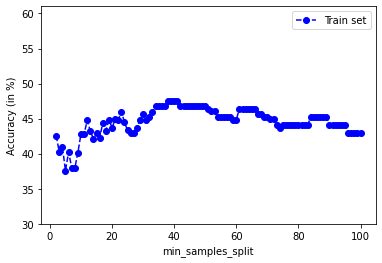

Valor ótimo para o parâmetro min_samples_split: 39
Accuracy (%): 47.54985754985754


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

train = []
for i in range(2,101):
    dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=i)

    scores = cross_val_score(dtc, X=X_train, y=y_train, cv=10) # cross-validation
    mean_score = np.mean(scores)
 
    train.append(mean_score*100)

# Fazer um gráfico com a accuracy
x = np.arange(2,101,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.ylim(30,61) # limite dos eixo dos yy's
plt.xlabel('min_samples_split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

print("Valor ótimo para o parâmetro min_samples_split:", x[train.index(max(train))])
print("Accuracy (%):", max(train))

Sabendo que o valor ótimo para o `min_samples_split` é de 39, fixa-se este valor, e faz-se variar agora o parâmetro `max_depth`, novamente entre 2 e 100:

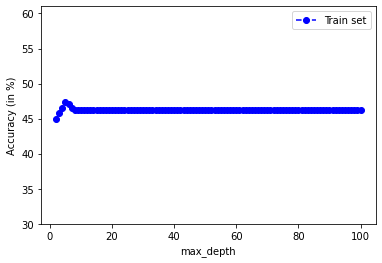

Valor ótimo para o parâmetro max_depth: 5
Accuracy (%): 47.41477272727273


In [4]:
train = []
for i in range(2,101):
    dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=39, max_depth=i)

    scores = cross_val_score(dtc,X=X_dum,y=y,cv=10)
    mean_score = np.mean(scores)
 
    train.append(mean_score*100)
# fazer um gráfico com a accuracy
x = np.arange(2,101,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
#plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,61) # limite dos eixo dos yy's
plt.xlabel('max_depth') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

print("Valor ótimo para o parâmetro max_depth:", x[train.index(max(train))])
print("Accuracy (%):", max(train))

Novamente, sabendo que o valor ótimo para o `max_depth` é de 5, fixa-se este valor e faz-se variar o último parâmetro, `min_samples_leaf`, entre 2 e 100:

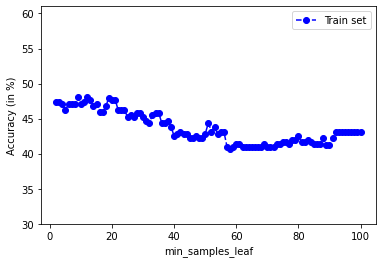

Valor ótimo para o parâmetro min_samples_leaf: 9
Accuracy (%): 48.02083333333334



In [5]:
train = []
for i in range(2,101):
    dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=39, max_depth=5, min_samples_leaf=i)

    scores = cross_val_score(dtc,X=X_dum,y=y,cv=10)
    mean_score = np.mean(scores)
 
    train.append(mean_score*100)
# fazer um gráfico com a accuracy
x = np.arange(2,101,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
#plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,61) # limite dos eixo dos yy's
plt.xlabel('min_samples_leaf') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

print("Valor ótimo para o parâmetro min_samples_leaf:", x[train.index(max(train))])
print("Accuracy (%):", max(train))

dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=39, max_depth=5, min_samples_leaf=9)
dtc.fit(X_train, y_train)
print()

Tendo agora um modelo completo com accurary de 48.02%, repetimos a metodologia, mas em vez de começar pelo parâmetro `min_samples_split`, começámos por cada um dos outros, tendo obtido os seguintes modelos:
- Começando por `min_samples_leaf`, o modelo obtido foi: `min_samples_leaf=25, max_depth=3, min_samples_split=58` com uma accuracy de 46.18%
- Começando por `max_depth`, o modelo obtido foi: `max_depth=3, min_samples_leaf=24, min_samples_split=2` com uma accuracy também de 46.18%

O modelo ótimo obtido para um modelo de Árvore de Decisão é então:

```python
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=39, max_depth=5, min_samples_leaf=9)
```


#### k-NN

Repetindo a metodologia já enunciada, mas fazendo variar o parâmetro `n_neighbors` entre 1 e 100:

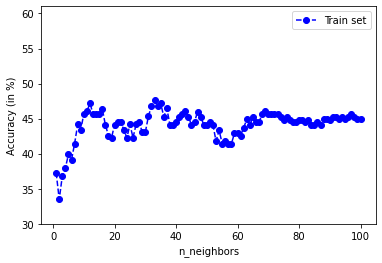

Valor ótimo para o parâmetro n_neighbors: 33
Accuracy (%): 47.592592592592595



In [6]:
from sklearn.neighbors import KNeighborsClassifier

train = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)

    scores = cross_val_score(knn, X=X_train, y=y_train, cv=10)
    mean_score = np.mean(scores)
 
    train.append(mean_score*100)
# fazer um gráfico com a accuracy
x = np.arange(1,101,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
#plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(30,61) # limite dos eixo dos yy's
plt.xlabel('n_neighbors') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

print("Valor ótimo para o parâmetro n_neighbors:", x[train.index(max(train))])
print("Accuracy (%):", max(train))

knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
print()

O modelo ótimo obtido para um modelo de k-NN é então:

```python
knn = KNeighborsClassifier(n_neighbors=33)
```

#### Naïve Bayes

Como para modelos Naïve Bayes gaussianos não existem parâmetros varíaveis (que estejam dentro do programa da UC), basta efetuar uma única validação cruzada:

In [7]:
from sklearn.naive_bayes import GaussianNB

nbayes = GaussianNB()
nbayes.fit(X_train, y_train)

# Validação - Cross Validation
scores = cross_val_score(nbayes,
                         X=X_dum,
                         y=y,
                         cv=10
                        )
print('CV accuracy:', *scores*100, sep='\n\t')
print('CV accuracy média: %.3f +/- %.3f' %(np.mean(scores)*100, np.std(scores)*100))

CV accuracy:
	30.303030303030305
	27.27272727272727
	27.27272727272727
	24.242424242424242
	36.36363636363637
	48.484848484848484
	36.36363636363637
	45.45454545454545
	27.27272727272727
	31.25
CV accuracy média: 33.428 +/- 7.753


O modelo Naïve Bayes é então:

```python
nbayes = GaussianNB()
```

### 2.2. Seleção e apresentação do melhor modelo

Sumarizando, os valores obtidos para a accuracy do melhor modelo para cada tipologia foram:
- Árvore de Decisão - 48.02%
- k-NN - 47.59%
- Naïve Bayes - 33.43%

Conclui-se assim, que o melhor modelo para prever resultados no próprio conjunto de treino é o modelo da Árvore de Decisão.

```python
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=39, max_depth=5, min_samples_leaf=9)
```

## 3. Validação do modelo final ajustado com um conjunto de validação independente

De modo a validar o modelo obtido, criou-se um conjunto de teste, com 20% dos pontos do conjunto de dados do ficheiro `train.csv`:

```python
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, random_state=1, train_size=0.80)
```
Depois basta correr uma cross-validation sobre o modelo, utilizando os dados de teste:


In [8]:
scores = cross_val_score(dtc,
                         X=X_test,
                         y=y_test,
                         cv=4 # The least populated class in y has only 4 members
                        )
print('CV accuracy:', *scores*100, sep='\n\t')
print('CV accuracy média: %.3f +/- %.3f' %(np.mean(scores)*100, np.std(scores)*100))

CV accuracy:
	47.05882352941176
	52.94117647058824
	43.75
	43.75
CV accuracy média: 46.875 +/- 3.754


Tendo obtido o valor de `46.88%` para a accuracy, conclui-se que o modelo é ligeiramente menos exato a trabalhar com dados que ainda não viu. 

No entanto o valor de incerteza para o valor de accuracy obtido é de `± 3.75`, pelo que esta interpretação pode não estar completamente correta. Este valor elevado deriva do facto de se utilizar um baixo valor de folds no cross-validation, o que é necessário dado o tamanho reduzido do conjunto de teste.

## 4. Competição

Para chegar à solução submetida, começámos por testar cada um dos 3 modelos construídos anteriormente, treinados utilizando o conjunto de dados completo do ficheiro `train.csv` sendo que:
- O modelo de Árvore de Decisão obteve um score de `0.31953`
- O modelo de k-NN obteve um score de `0.32380`
- O modelo de Naïve Bayes obteve um score de `0.46800`

Para submeter na competição, escolheu-se o modelo de Naïve Bayes, que apesar de ter obtido o menor score com os dados de treino, foi o que obteve o score mais elevado com os dados de teste (da competição). Isto poderá ser explicado pelo facto de ser o modelo menos overfitted para os dados de treino.

In [10]:
# Tratar os dados de test.csv
data_comp = pd.read_csv("test.csv", sep=",")

col_names_comp = np.array(data_comp.columns)[col_idxs]
col_names_dum_comp = np.array(data_comp.columns)[col_idxs_dum]

X_comp = data_comp.values[:,col_idxs]

df_X_comp = data_comp[col_names_comp]
df_X_dum_comp = pd.get_dummies(df_X_comp, columns=col_names_dum_comp)
X_dum_comp = df_X_dum_comp.values
col_names_dum_comp = np.array(df_X_dum_comp.columns)

# Modelo utilizado
nbayes_comp = GaussianNB()
nbayes_comp.fit(X_dum,y)

# Prever
model = nbayes_comp # the model used to make the predictions
submission = ['ID,Stage'] # the list that will contain all the lines to write in the file
preds = model.predict(X_dum_comp)

# Escrever as predições para um ficheiro de output, que servirá para a submissão. (Está comentado para não gerar ficheiros indesejados)
# for i in range(df_X_dum_comp.shape[0]):
#     line = f"{data_comp.values[i][0]},{preds[i]}"
#     submission.append(line)

# f = open("submission.csv", "w")
# for line in submission:
#     f.write(line + '\n')
# f.close()